In [1]:
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"Running Cantera Version: {ct.__version__}")

Running Cantera Version: 3.0.0


In [2]:
To = 300
Po = 101325
equivalance_ratios= np.arange(0.5,1.6,0.1)
flame_speeds= []
# Define the gas-mixutre and kinetics
# In this case, we are choosing a GRI3.0 gas
gas = ct.Solution("Jerzembeck.yaml")

In [3]:
for phi in equivalance_ratios:
    gas.set_equivalence_ratio(phi, "IXC8H18", {"O2": 1.0, "N2": 3.76})
    gas.TP = To, Po
    width = 0.02
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    flame.solve(loglevel=0, auto=True)
    Su0 = flame.velocity[0]
    flame_speeds.append(Su0)

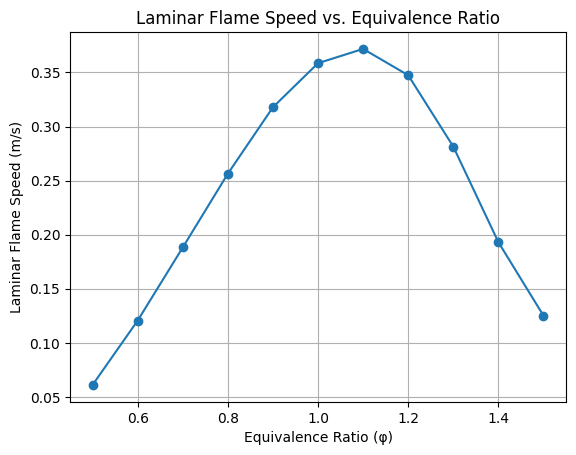

In [4]:
plt.plot(equivalance_ratios, flame_speeds, marker='o', linestyle='-')
plt.xlabel("Equivalence Ratio (φ)")
plt.ylabel("Laminar Flame Speed (m/s)")
plt.title("Laminar Flame Speed vs. Equivalence Ratio")
plt.grid(True)
plt.show()